In [1]:
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = arff.loadarff("./regression_data/housing.arff")
df = pd.DataFrame(data[0])
to_clf = "class"

In [2]:
print(df.shape)
df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,class
0,0.00632,18.0,2.31,b'0',0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,b'0',0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,b'0',0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,b'0',0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,b'0',0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
print("ZN values: ",pd.unique(df["ZN"]))
print("CHAS values: ",pd.unique(df["CHAS"]))
print("RAD",pd.unique(df["RAD"]))

ZN values:  [ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]
CHAS values:  [b'0' b'1']
RAD [ 1.  2.  3.  5.  4.  8.  6.  7. 24.]


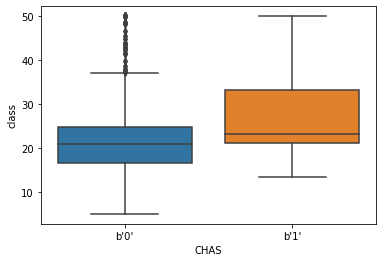

In [4]:
import seaborn as sns
fig, axs = plt.subplots(1, 1, sharey=True)
sns.boxplot(x="CHAS", y=to_clf, data=df)

In [5]:

#########################################
chas_dummies = pd.get_dummies(df.CHAS, prefix='CHAS')
df_dum = pd.concat([chas_dummies, df], axis=1)
df_dum = df_dum.drop(columns=["CHAS"])
df_dum.head()


#df_dum = df.copy()
#df_dum['tpCHAS'] = df.CHAS.map({'b\'0\'':0, 'b\'1\'':1})
#df_dum.head()


,CHAS_b'0',CHAS_b'1',CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,class
0,1,0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,1,0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,1,0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,1,0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


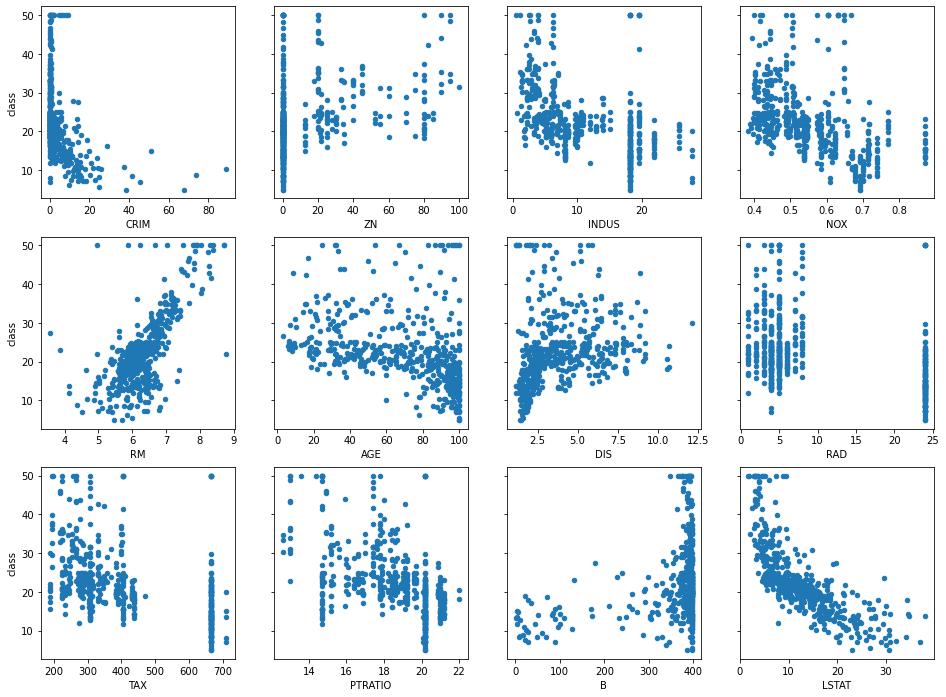

In [6]:
df_sc = df_dum.copy()
to_clf = "class"
a= 4
fig, axs = plt.subplots(a-1, a, sharey=True)
for i,col in enumerate(df_sc.columns[2:-1]):
    df_sc.plot(kind='scatter', x=col, y=to_clf, ax=axs[i//a,i%a], figsize=(16, 12))

#data.plot(kind='scatter', x='CRIM', y=to_clf, ax=axs[0], figsize=(10, 4))
#data.plot(kind='scatter', x='ZN', y=to_clf, ax=axs[1])
#data.plot(kind='scatter', x='INDUS', y=to_clf, ax=axs[2])

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
df_reg = df_sc.copy()

reg = LinearRegression()
X = df_reg.drop(columns=[to_clf]).values
y = df_reg[to_clf].values

cross_val_score(reg, X, y, cv=10)

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [8]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
cross_val_score(tree, X, y, cv=10)

array([ 0.48261937,  0.52771748, -1.36359476,  0.51480065,  0.77318501,
        0.51246919,  0.21378506,  0.35402525, -1.96169333,  0.13468237])

(50, 1)


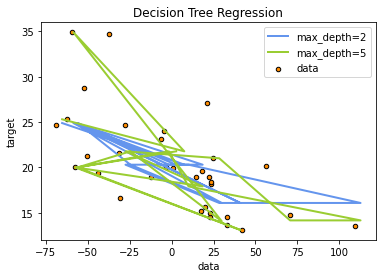

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

data_reg = df_reg.head(n=50)

X = data_reg.drop(columns=[to_clf]).values
y = data_reg[to_clf].values

#X = SelectKBest(k=1).fit_transform(X, y.reshape((-1,1)))
pca = PCA(n_components=1)
X = pca.fit_transform(X)
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
pred1 = regr_1.predict(X_test)
pred2 = regr_2.predict(X_test)

plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, pred1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, pred2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

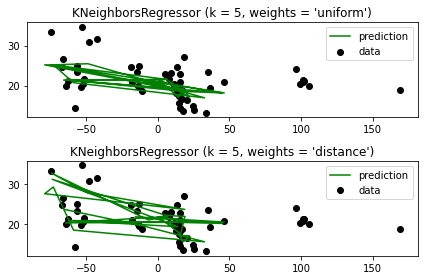

In [10]:
from sklearn import neighbors

data_reg = df_reg.head(80)

X = data_reg.drop(columns=[to_clf]).values
y = data_reg[to_clf].values
pca = PCA(n_components=1)
X = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

n_neighbors = 5
for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    pred = knn.fit(X_train, y_train).predict(X_test)

    # 3. plot utils
    plt.subplot(2, 1, i + 1)
    plt.scatter(X_train, y_train, c='k', label='data')
    plt.plot(X_test, pred, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

In [11]:
from sklearn.model_selection import cross_val_score
df_reg = df_sc

reg = LinearRegression()
tree = DecisionTreeRegressor()
knn = neighbors.KNeighborsRegressor(5, weights="distance")

X = df_reg.drop(columns=[to_clf]).values
y = df_reg[to_clf].values

print("R2 for LR:\n",np.around(cross_val_score(reg, X, y, cv=10, scoring='r2'),3))
print("Mean: ",np.mean(np.around(cross_val_score(reg, X, y, cv=10, scoring='r2'),3)))
print("std: ",np.std(np.around(cross_val_score(reg, X, y, cv=10, scoring='r2'),3)),"\n")

print("R2 for DT:\n",np.around(cross_val_score(tree, X, y, cv=10, scoring='r2'),3))
print("Mean: ",np.mean(np.around(cross_val_score(tree, X, y, cv=10, scoring='r2'),3)))
print("std: ",np.std(np.around(cross_val_score(tree, X, y, cv=10, scoring='r2'),3)),"\n")


print("R2 for KNN:\n",np.around(cross_val_score(knn, X, y, cv=10, scoring='r2'),3))
print("Mean: ",np.mean(np.around(cross_val_score(knn, X, y, cv=10, scoring='r2'),3)))
print("std: ",np.std(np.around(cross_val_score(knn, X, y, cv=10, scoring='r2'),3)),"\n")

print("\n\n")

print("MAE for LR:\n",np.around(cross_val_score(reg, X, y, cv=10, scoring='neg_mean_absolute_error'),3))
print("Mean: ",np.mean(cross_val_score(reg, X, y, cv=10, scoring='neg_mean_absolute_error')))
print("std: ",np.std(np.around(cross_val_score(reg, X, y, cv=10, scoring='neg_mean_absolute_error'),3)),"\n")


print("MAE for DT:\n",np.around(cross_val_score(tree, X, y, cv=10, scoring='neg_mean_absolute_error'),3))
print("Mean: ",np.mean(cross_val_score(tree, X, y, cv=10, scoring='neg_mean_absolute_error')))
print("std: ",np.std(np.around(cross_val_score(tree, X, y, cv=10, scoring='neg_mean_absolute_error'),3)),"\n")

print("MAE for knn:\n",np.around(cross_val_score(knn, X, y, cv=10, scoring='neg_mean_absolute_error'),3))
print("Mean: ",np.mean(cross_val_score(knn, X, y, cv=10, scoring='neg_mean_absolute_error')))
print("std: ",np.std(np.around(cross_val_score(knn, X, y, cv=10, scoring='neg_mean_absolute_error'),3)),"\n")

R2 for LR:
 [ 0.734  0.473 -1.006  0.641  0.548  0.736  0.378 -0.129 -0.768  0.419]
Mean:  0.20259999999999997
std:  0.5951339681113824 

R2 for DT:
 [ 0.534  0.566 -1.326  0.538  0.754  0.207  0.221  0.367 -2.451 -0.981]
Mean:  -0.0831
std:  1.2301295704111823 

R2 for KNN:
 [ -1.361  -1.336 -40.446  -0.651  -0.349  -0.637  -1.634   0.069  -0.507
  -0.323]
Mean:  -4.7175
std:  11.920383955645052 




MAE for LR:
 [-2.207 -2.897 -2.787 -4.598 -4.11  -3.565 -2.67  -9.656 -5.023 -2.537]
Mean:  -4.004946635323969
std:  2.08345002339869 

MAE for DT:
 [-3.371 -2.273 -3.292 -5.257 -3.537 -4.737 -3.326 -6.11  -4.642 -3.946]
Mean:  -3.9027960784313733
std:  1.221820400058863 

MAE for knn:
 [ -6.992  -5.962 -14.272  -9.492  -6.276  -8.107  -4.898  -7.431  -4.458
  -3.302]
Mean:  -7.118912483378812
std:  2.941406194322709 

